Let's work through a simple regression project to understand the basics of neural networks

## The Data

 We will use a very simple fake data set. For now, let's focus on the syntax of TensorFlow 2.0.

Our goal is to predict the sale price
## **Data Acquisition**

In [10]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('regression.csv')

In [11]:
df.head()

,price,feature1,feature2
0,461.527929,0.443804,0.488558
1,548.130011,0.293234,0.713630
2,410.297162,0.489776,0.325952
3,540.382220,0.470585,0.607564
4,546.024553,0.550877,0.589505


In [12]:
df.tail()

,price,feature1,feature2
995,476.526078,0.481437,0.472094
996,457.313186,0.292220,0.533338
997,456.720992,0.714406,0.326586
998,403.315576,0.603728,0.276370
999,599.367093,0.353503,0.785757


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [14]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,0.480654,0.526252
std,93.785431,0.158388,0.167235
min,223.346793,0.000000,0.000000
25%,433.025732,0.369736,0.409204
50%,502.382117,0.479962,0.530202
75%,564.921588,0.582028,0.643617
max,774.407854,1.000000,1.000000


<Axes: ylabel='Frequency'>

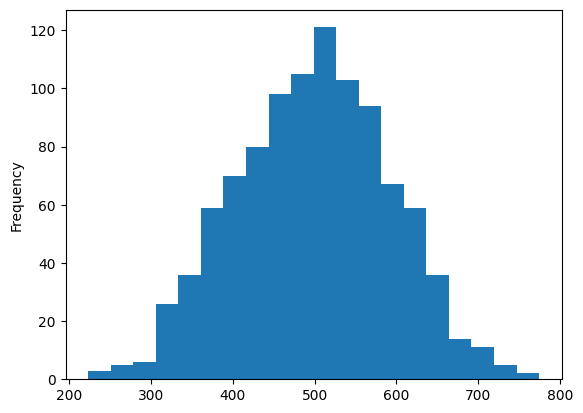

In [17]:
df['price'].plot(kind='hist',bins=20)

<Axes: ylabel='Frequency'>

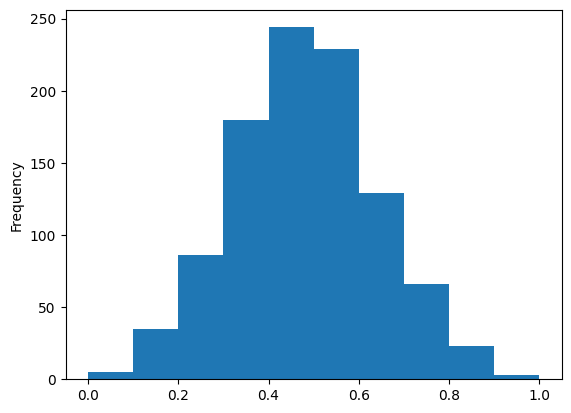

In [18]:
df['feature1'].plot(kind='hist')

<Axes: ylabel='Frequency'>

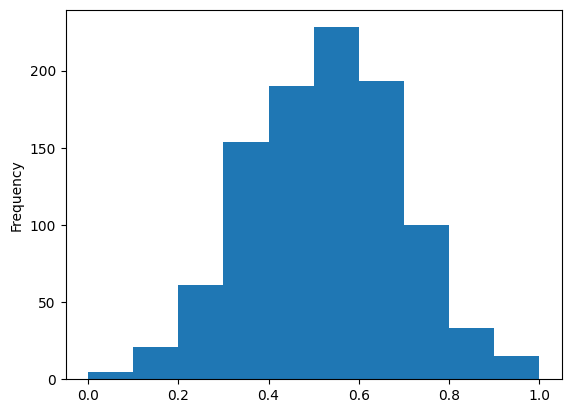

In [19]:
df['feature2'].plot(kind='hist')

## **Data Preparation**


### Test/Train Split

In [24]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

## Creating a Model

In [33]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output layer for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# Training

In [34]:
model.fit(X_train,y_train,epochs=150)

Epoch 1/150
22/22 [==============================] - 1s 2ms/step - loss: 256700.8906
Epoch 2/150
22/22 [==============================] - 0s 2ms/step - loss: 256655.3438
Epoch 3/150
22/22 [==============================] - 0s 2ms/step - loss: 256605.4688
Epoch 4/150
22/22 [==============================] - 0s 2ms/step - loss: 256547.0625
Epoch 5/150
22/22 [==============================] - 0s 2ms/step - loss: 256478.4844
Epoch 6/150
22/22 [==============================] - 0s 2ms/step - loss: 256398.0156
Epoch 7/150
22/22 [==============================] - 0s 2ms/step - loss: 256303.9375
Epoch 8/150
22/22 [==============================] - 0s 2ms/step - loss: 256195.6094
Epoch 9/150
22/22 [==============================] - 0s 2ms/step - loss: 256070.6719
Epoch 10/150
22/22 [==============================] - 0s 2ms/step - loss: 255928.2812
Epoch 11/150
22/22 [==============================] - 0s 2ms/step - loss: 255765.7656
Epoch 12/150
22/22 [==============================] - 0s 2ms/st

## Predicting new data

In [37]:
# [[Feature1, Feature2]]
new_data_point = [[0.5,.8]]

In [38]:
model.predict(new_data_point)

1/1 [==============================] - 0s 116ms/step


array([[603.8606]], dtype=float32)